In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_json('sales.json')
sales_data

,OrderID,ProductID,Quantity,PricePerUnit,OrderDate,CustomerID,Region
0,1,101,5,10,2023-10-01,C001,North
1,2,3,3,15,2023-10-02,C002,South
2,3,103,10,5,2023-10-03,C003,East
3,4,104,8,10,2023-10-04,C004,West
4,5,105,4,8,2023-10-05,C005,North
5,6,106,6,15,2023-10-06,C006,South
6,7,107,9,5,2023-10-07,C007,East
7,8,5,7,8,2023-10-08,C008,West
8,9,109,6,10,2023-10-09,C009,North
9,10,110,5,15,2023-10-10,C010,South


In [3]:
sales_data.info()
sales_data['ProductID'] = pd.to_numeric(sales_data['ProductID'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       30 non-null     int64 
 1   ProductID     30 non-null     int64 
 2   Quantity      30 non-null     int64 
 3   PricePerUnit  30 non-null     int64 
 4   OrderDate     30 non-null     object
 5   CustomerID    30 non-null     object
 6   Region        30 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.8+ KB


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Hypothesis Testing</h4> For the Sales Data dataset (Dataset 1), perform a hypothesis test to determine if there is a statistically significant difference in average product prices (PricePerUnit) between different regions (Region). Use a suitable statistical test, such as ANOVA or a t-test, and interpret the results.
</div>

In [4]:
import scipy.stats as stats

# Sample data for each region
region_north = sales_data[sales_data['Region'] == 'North']['PricePerUnit']
region_south = sales_data[sales_data['Region'] == 'South']['PricePerUnit']
region_east = sales_data[sales_data['Region'] == 'East']['PricePerUnit']
region_west = sales_data[sales_data['Region'] == 'West']['PricePerUnit']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(region_north, region_south, region_east, region_west)

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in average product prices between regions.")
else:
    print("There is no statistically significant difference in average product prices between regions.")


There is a statistically significant difference in average product prices between regions.


In [5]:
region_north = sales_data[sales_data['Region'] == 'North']['PricePerUnit']
region_south = sales_data[sales_data['Region'] == 'South']['PricePerUnit']

t_test, p_value = stats.ttest_ind(region_north, region_south)

alpha = 0.05

if p_value > alpha:
     print("Fail to reject the null hypothesis. There is no significant difference in duration between the groups.")
else:
    print("Reject the null hypothesis. There is a significant difference in duration between the groups.")

Reject the null hypothesis. There is a significant difference in duration between the groups.


C:\Users\Зангар\AppData\Local\Temp\ipykernel_1204\543408366.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_test, p_value = stats.ttest_ind(region_north, region_south)


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Probability Distributions</h4> Calculate the probability distribution of customer ratings (Rating) in the Customer Feedback dataset (Dataset2).
</div>

In [6]:
feedback_data = pd.read_json('Customer_Feedback.json')
feedback_data

,CustomerID,Feedback,Rating
0,C001,The product quality is excellent!,5
1,C002,Fast and efficient service.,4
2,C003,I'm very satisfied with the purchase.,5
3,C004,The product could be improved.,3
4,C005,Great customer support.,5
5,C006,The delivery was late.,2
6,C007,The product is worth the price.,4
7,C008,"Terrible experience, won't shop here again.",1
8,C009,Good value for money.,4
9,C010,"Impressive service, highly recommend.",5


In [7]:
import pandas as pd

# Sample data (you can replace this with your actual dataset)
data = feedback_data['Rating']

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the frequency of each rating
rating_counts = df['Rating'].value_counts()

# Calculate the probability distribution
total_ratings = df.shape[0]
probability_distribution = rating_counts / total_ratings

# Sort the results by rating
probability_distribution = probability_distribution.sort_index()

# Display the probability distribution
print(probability_distribution)


1    0.133333
2    0.133333
3    0.166667
4    0.233333
5    0.333333
Name: Rating, dtype: float64


<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Exploratory Data Analysis (EDA)</h4>For the Employee Performance dataset (Dataset 3):
Conduct an EDA to identify outliers in the Salary column using appropriate visualization techniques.
Calculate the interquartile range (IQR) for salaries in each department and determine if there are significant differences
</div>

In [8]:
performance_data = pd.read_json('Employee_Performance.json')
performance_data

,EmployeeID,Department,Salary,PerformanceScore
0,E001,HR,55000,Excellent
1,E002,IT,75000,Good
2,E003,Sales,60000,Excellent
3,E004,Finance,65000,Satisfactory
4,E005,IT,72000,Excellent
5,E006,HR,58000,Good
6,E007,Sales,61000,Good
7,E008,Finance,67000,Excellent
8,E009,IT,73000,Good
9,E010,HR,56000,Satisfactory


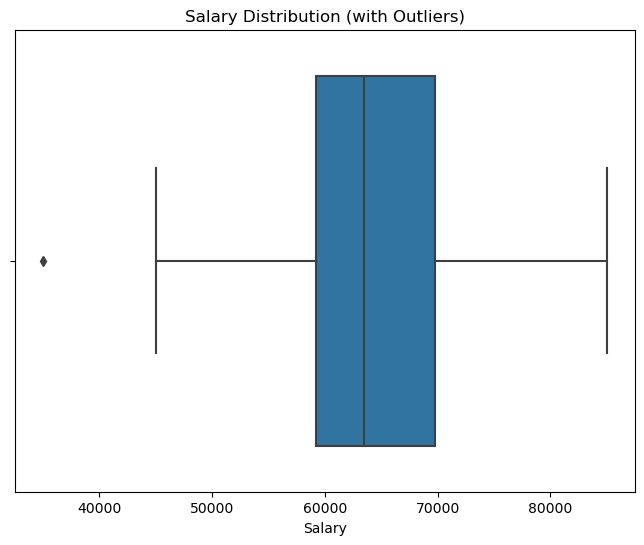

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=performance_data['Salary'])
plt.title("Salary Distribution (with Outliers)")
plt.xlabel("Salary")
plt.show()

In [10]:
iqr_data = performance_data.groupby('Department')['Salary'].describe()[['25%', '75%']]
iqr_data['IQR'] = iqr_data['75%'] - iqr_data['25%']
print(iqr_data)

                25%      75%     IQR
Department                          
Finance     65500.0  68500.0  3000.0
HR          56750.0  60250.0  3500.0
IT          72750.0  75250.0  2500.0
Sales       60500.0  63500.0  3000.0


<Axes: xlabel='Department', ylabel='Salary'>

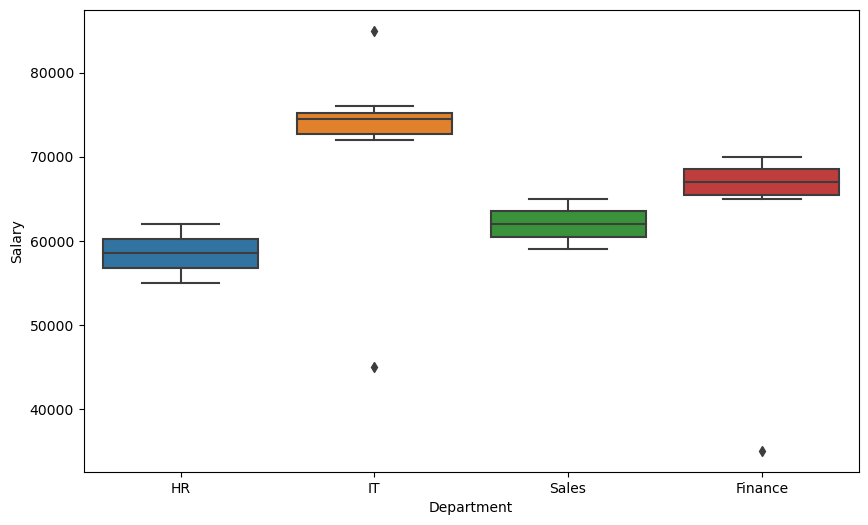

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=performance_data)

<div style="font-size: 13pt; font-family: verdana; color: #08415C"> 
    <h4>Data Manipulation and Joins</h4>Combine the Sales Data dataset (Dataset 1) and the Product Inventory dataset (Dataset 4) using an appropriate join operation to create a new dataset that includes product sales and inventory information. Calculate the total revenue for each product sold and the profit margin based on the price per unit and cost per unit (assume a fixed cost per unit).
</div>

In [12]:
product_inventory = pd.read_json('product_inventory.json')
product_inventory

,ProductID,ProductName,StockQuantity,ReorderLevel
0,1,Widget A,75,30
1,2,Gadget B,42,20
2,3,Doodad C,60,25
3,4,Thingamajig D,35,15
4,5,Widget E,80,35
5,6,Gadget F,50,20
6,7,Doodad G,65,30
7,8,Thingamajig H,40,18
8,9,Widget I,70,32
9,10,Gadget J,45,22


In [13]:
product_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductID      30 non-null     int64 
 1   ProductName    30 non-null     object
 2   StockQuantity  30 non-null     int64 
 3   ReorderLevel   30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [14]:
import pandas as pd

# Merge the datasets using a common key, which is 'ProductID'
combined_data = pd.merge(sales_data, product_inventory, on='ProductID', how='inner')

# Calculate the total revenue for each product sold
combined_data['TotalRevenue'] = combined_data['Quantity'] * combined_data['PricePerUnit']
combined_data['PricePerUnit'] 

0    15
1     8
2    10
3     8
4     5
5     8
6    10
7     8
Name: PricePerUnit, dtype: int64

In [15]:
sales_data['PricePerUnit']

0     10
1     15
2      5
3     10
4      8
5     15
6      5
7      8
8     10
9     15
10     5
11     8
12    10
13    15
14     5
15     8
16    10
17    15
18     5
19     8
20    10
21    15
22     5
23     8
24    10
25    15
26     5
27     8
28    10
29    15
Name: PricePerUnit, dtype: int64

In [16]:
# Calculate the cost per unit (you need to define your fixed cost)
# Replace 'your_fixed_cost' with the actual cost per unit
combined_data['CostPerUnit'] = sales_data['PricePerUnit']

# Calculate the profit margin    
combined_data['ProfitMargin'] = (combined_data['TotalRevenue'] - (combined_data['Quantity'] * combined_data['CostPerUnit'])) / combined_data['TotalRevenue']

# Now you have a new dataset with product sales and inventory information, total revenue, and profit margin
# You can access this information using the 'combined_data' DataFrame
combined_data

,OrderID,ProductID,Quantity,PricePerUnit,OrderDate,CustomerID,Region,ProductName,StockQuantity,ReorderLevel,TotalRevenue,CostPerUnit,ProfitMargin
0,2,3,3,15,2023-10-02,C002,South,Doodad C,60,25,45,10,0.333333
1,8,5,7,8,2023-10-08,C008,West,Widget E,80,35,56,15,-0.875000
2,13,11,4,10,2023-10-13,C013,North,Doodad K,55,28,40,5,0.500000
3,16,12,3,8,2023-10-16,C016,West,Thingamajig L,38,17,24,10,-0.250000
4,23,24,7,5,2023-10-23,C023,East,Thingamajig X,39,18,35,8,-0.600000
5,24,28,5,8,2023-10-24,C024,West,Thingamajig BB,37,17,40,15,-0.875000
6,25,25,6,10,2023-10-25,C025,North,Widget Y,79,36,60,5,0.500000
7,28,1,4,8,2023-10-28,C028,West,Widget A,75,30,32,8,0.000000


In [17]:
CustomerDemographics = pd.read_json('CustomerDemographics.json')
CustomerDemographics

,CustomerID,Age,Gender,Income
0,1,28,Male,55000
1,2,35,Female,62000
2,3,45,Male,75000
3,4,22,Female,48000
4,5,29,Male,58000
5,6,40,Female,69000
6,7,32,Male,70000
7,8,26,Female,52000
8,9,38,Male,80000
9,10,31,Female,62000


In [18]:
average_income = CustomerDemographics.groupby(['Age', 'Gender'])['Income'].mean().reset_index()
average_income

,Age,Gender,Income
0,22,Female,48000.0
1,23,Female,52000.0
2,24,Female,50000.0
3,25,Female,48000.0
4,26,Female,52000.0
5,27,Female,54000.0
6,27,Male,54000.0
7,28,Female,58000.0
8,28,Male,55000.0
9,29,Female,56000.0
